# Exercice de prédiction medical_insurance dataset

## Introduction au Jeu de Données : Medical Insurance

Ce projet utilise le jeu de données (disponible sur Kaggle), qui contient des informations sur les assurés médicaux et leurs coûts d'assurance. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mohankrishnathalla/medical-insurance-cost-prediction")

print("Path to dataset files:", path)
# Trouve automatiquement le CSV présent dans le dossier
file = [f for f in os.listdir(path) if f.endswith(".csv")][0]

df = pd.read_csv(os.path.join(path, file))
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 5.62M/5.62M [00:03<00:00, 1.64MB/s]

Extracting files...


Path to dataset files: /home/yohan/.cache/kagglehub/datasets/mohankrishnathalla/medical-insurance-cost-prediction/versions/1


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [3]:
# df = pd.read_csv("medical_insurance.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(6)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0
5,76435,63,Female,North,Rural,305000.0,HS,Single,Employed,3,2,20.4,Never,Daily,1,0,0,2,137.0,96.0,69.2,5.70,HMO,Silver,500,20,5,0,4.66,0.6923,2697.34,528.68,44.06,1,1220.04,1220.04,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [4]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

#### Gestion des Valeurs Manquantes : Variable `alcohol_freq`

##### Constat
La variable **`alcohol_freq`** présente **un tiers de valeurs manquantes**. Cette proportion élevée de données absentes pose un défi majeur pour l'analyse et la modélisation.

 **Biais potentiel** :
   Les valeurs manquantes pourraient ne pas être aléatoires. Il est plausible que les individus n’ayant **pas renseigné leur fréquence de consommation d’alcool** soient des **grands consommateurs**, ce qui introduirait un **biais de sélection** si l’on tentait de combler ces valeurs (par exemple, en utilisant la moyenne ou la médiane).


### Décision : Suppression de la Variable
Pour ces raisons, nous avons choisi de **supprimer la colonne `alcohol_freq`** du jeu de données. Cette approche permet :
- D’éviter tout **biais lié aux valeurs manquantes**.
- De simplifier le prétraitement des données sans compromettre la qualité des prédictions.print(f"Taille de la base de données: {df.shape}")
print(f"\nValeurs manquantes:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values")

In [6]:
df = df.drop(columns=['alcohol_freq'])

df.describe()

In [8]:
print(df.dtypes)

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                            int64
policy_term_years        

Notre base de données contient **54 attributs** exploitables après sélection et nettoyage, répartis en trois types :

- **Catégorielles** (`object`) : Variables qualitatives (ex: `gender`, `smoker`).
- **Numériques continues** (`float`) : Variables à valeurs décimales (ex: `bmi`, `risk_score`).
- **Numériques discrètes** (`int`) : Variables entières (ex: `age`, `claims_count`).

##### Traitements à Appliquer:
- **Encodage** (One-Hot) pour les variables catégorielles.
- **Standardisation** pour les variables numériques (via `StandardScaler`).
- **Pipeline unifié** pour garantir une transformation cohérente des données d'entraînement et de test.

---

## Data visualisation

In [9]:
df_clean = df.copy()
if df_clean.isnull().sum().sum() > 0:
    df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

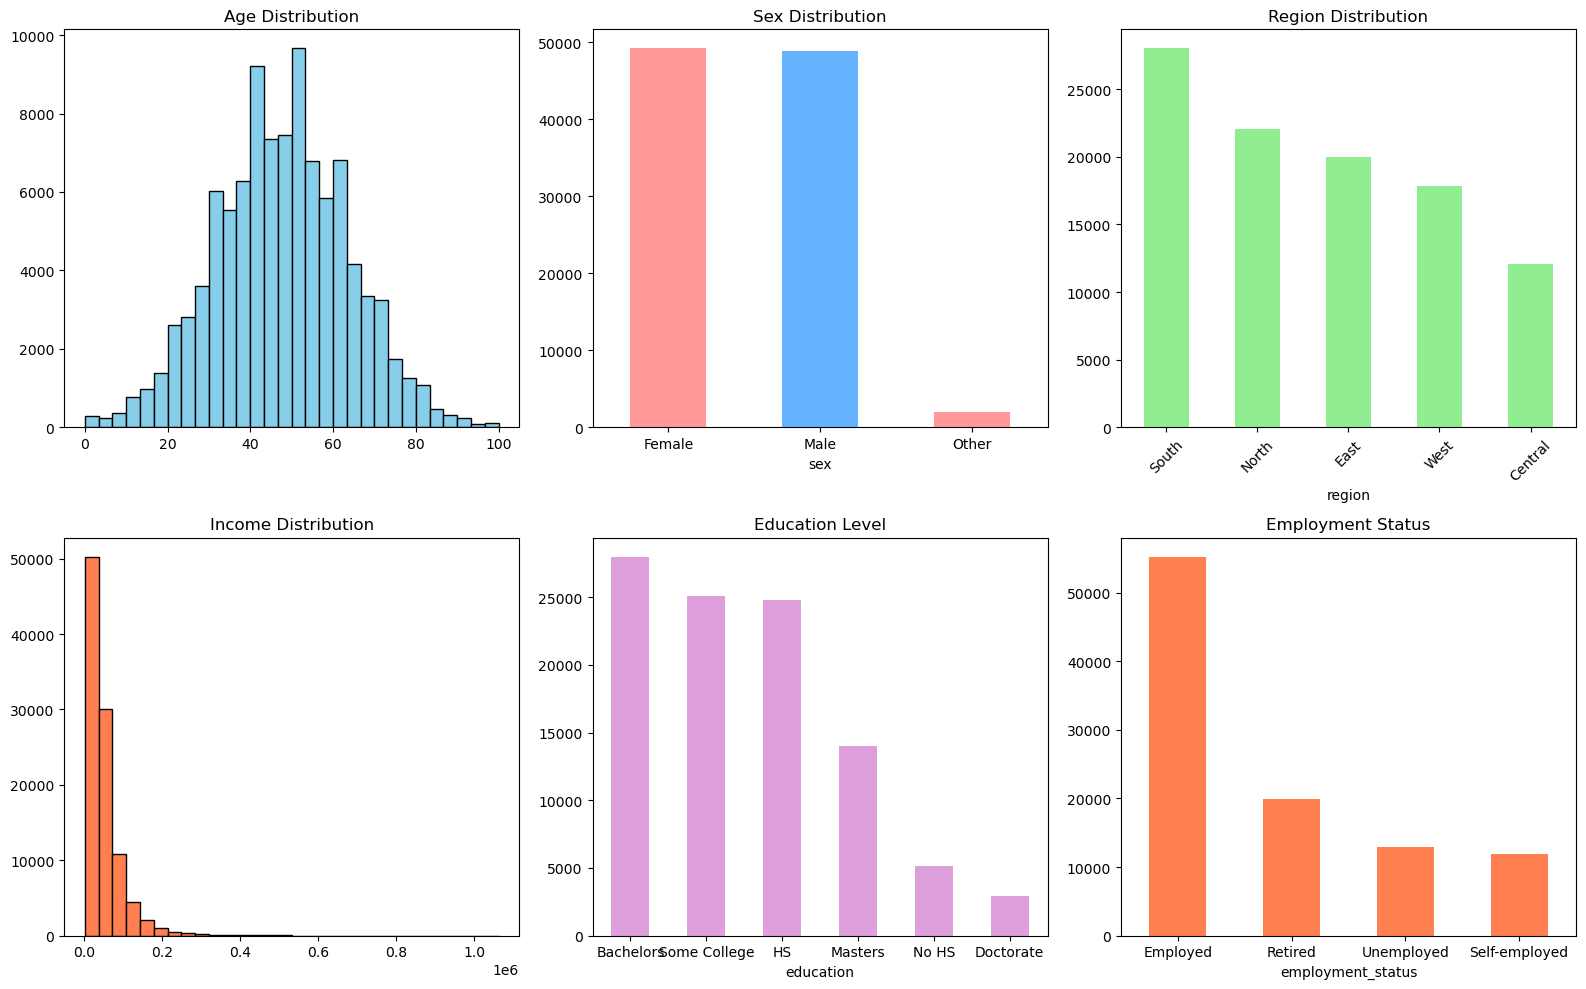

In [29]:
# --- Distributions générales ---
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
plots = [
    ('age', 'hist', 'Age Distribution', {'bins': 30, 'color': 'skyblue', 'edgecolor': 'black'}),
    ('sex', 'bar', 'Sex Distribution', {'color': ['#ff9999', '#66b3ff']}),
    ('region', 'bar', 'Region Distribution', {'color': 'lightgreen', 'rotation': 45}),
    ('income', 'hist', 'Income Distribution', {'bins': 30, 'color': 'coral', 'edgecolor': 'black'}),
    ('education', 'bar', 'Education Level', {'color': 'plum'}),
    ('employment_status', 'bar', 'Employment Status', {'color': 'coral'})
]

for ax, (col, kind, title, opts) in zip(axes.flat, plots):
    if kind == 'hist':
        ax.hist(df_clean[col], **{k: v for k, v in opts.items() if k != 'rotation'})
    else:  # bar
        df_clean[col].value_counts().plot(kind='bar', ax=ax, color=opts['color'])
        ax.tick_params(axis='x', rotation=opts.get('rotation', 0))
    ax.set_title(title)

plt.tight_layout()
plt.show()


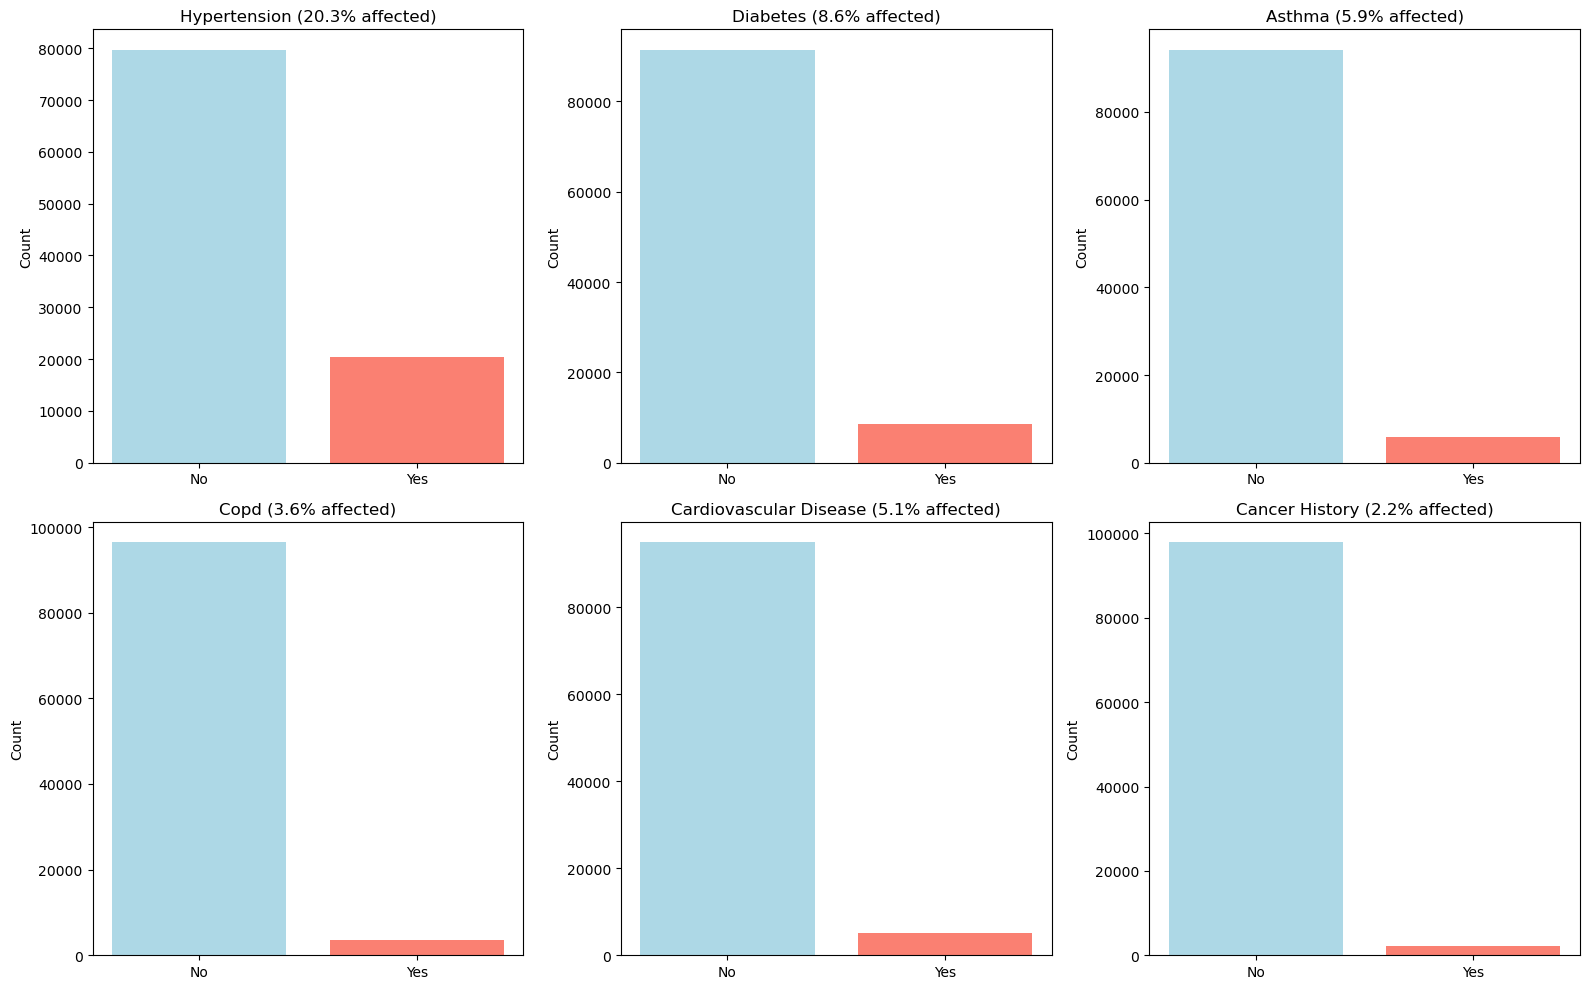

In [20]:
# --- Conditions de santé ---
health_cols = ['hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for ax, col in zip(axes.flat, health_cols):
    counts = df_clean[col].value_counts()
    prevalence = counts.get(1, 0) / len(df_clean) * 100
    ax.bar(['No', 'Yes'], [counts.get(0, 0), counts.get(1, 0)], color=['lightblue', 'salmon'])
    ax.set_title(f'{col.replace("_", " ").title()} ({prevalence:.1f}% affected)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Compte tenu du **nombre élevé de variables** (54 attributs), j’ai réalisé une **visualisation systématique** de l’ensemble des colonnes du jeu de données. Cette approche permet d’effectuer une **évaluation rapide des distributions** des différents critères, afin d’identifier :

- Les **tendances centrales** et la dispersion des variables numériques.
- Les **déséquilibres** ou particularités des variables catégorielles.
- Les **valeurs aberrantes** ou anomalies potentielles.


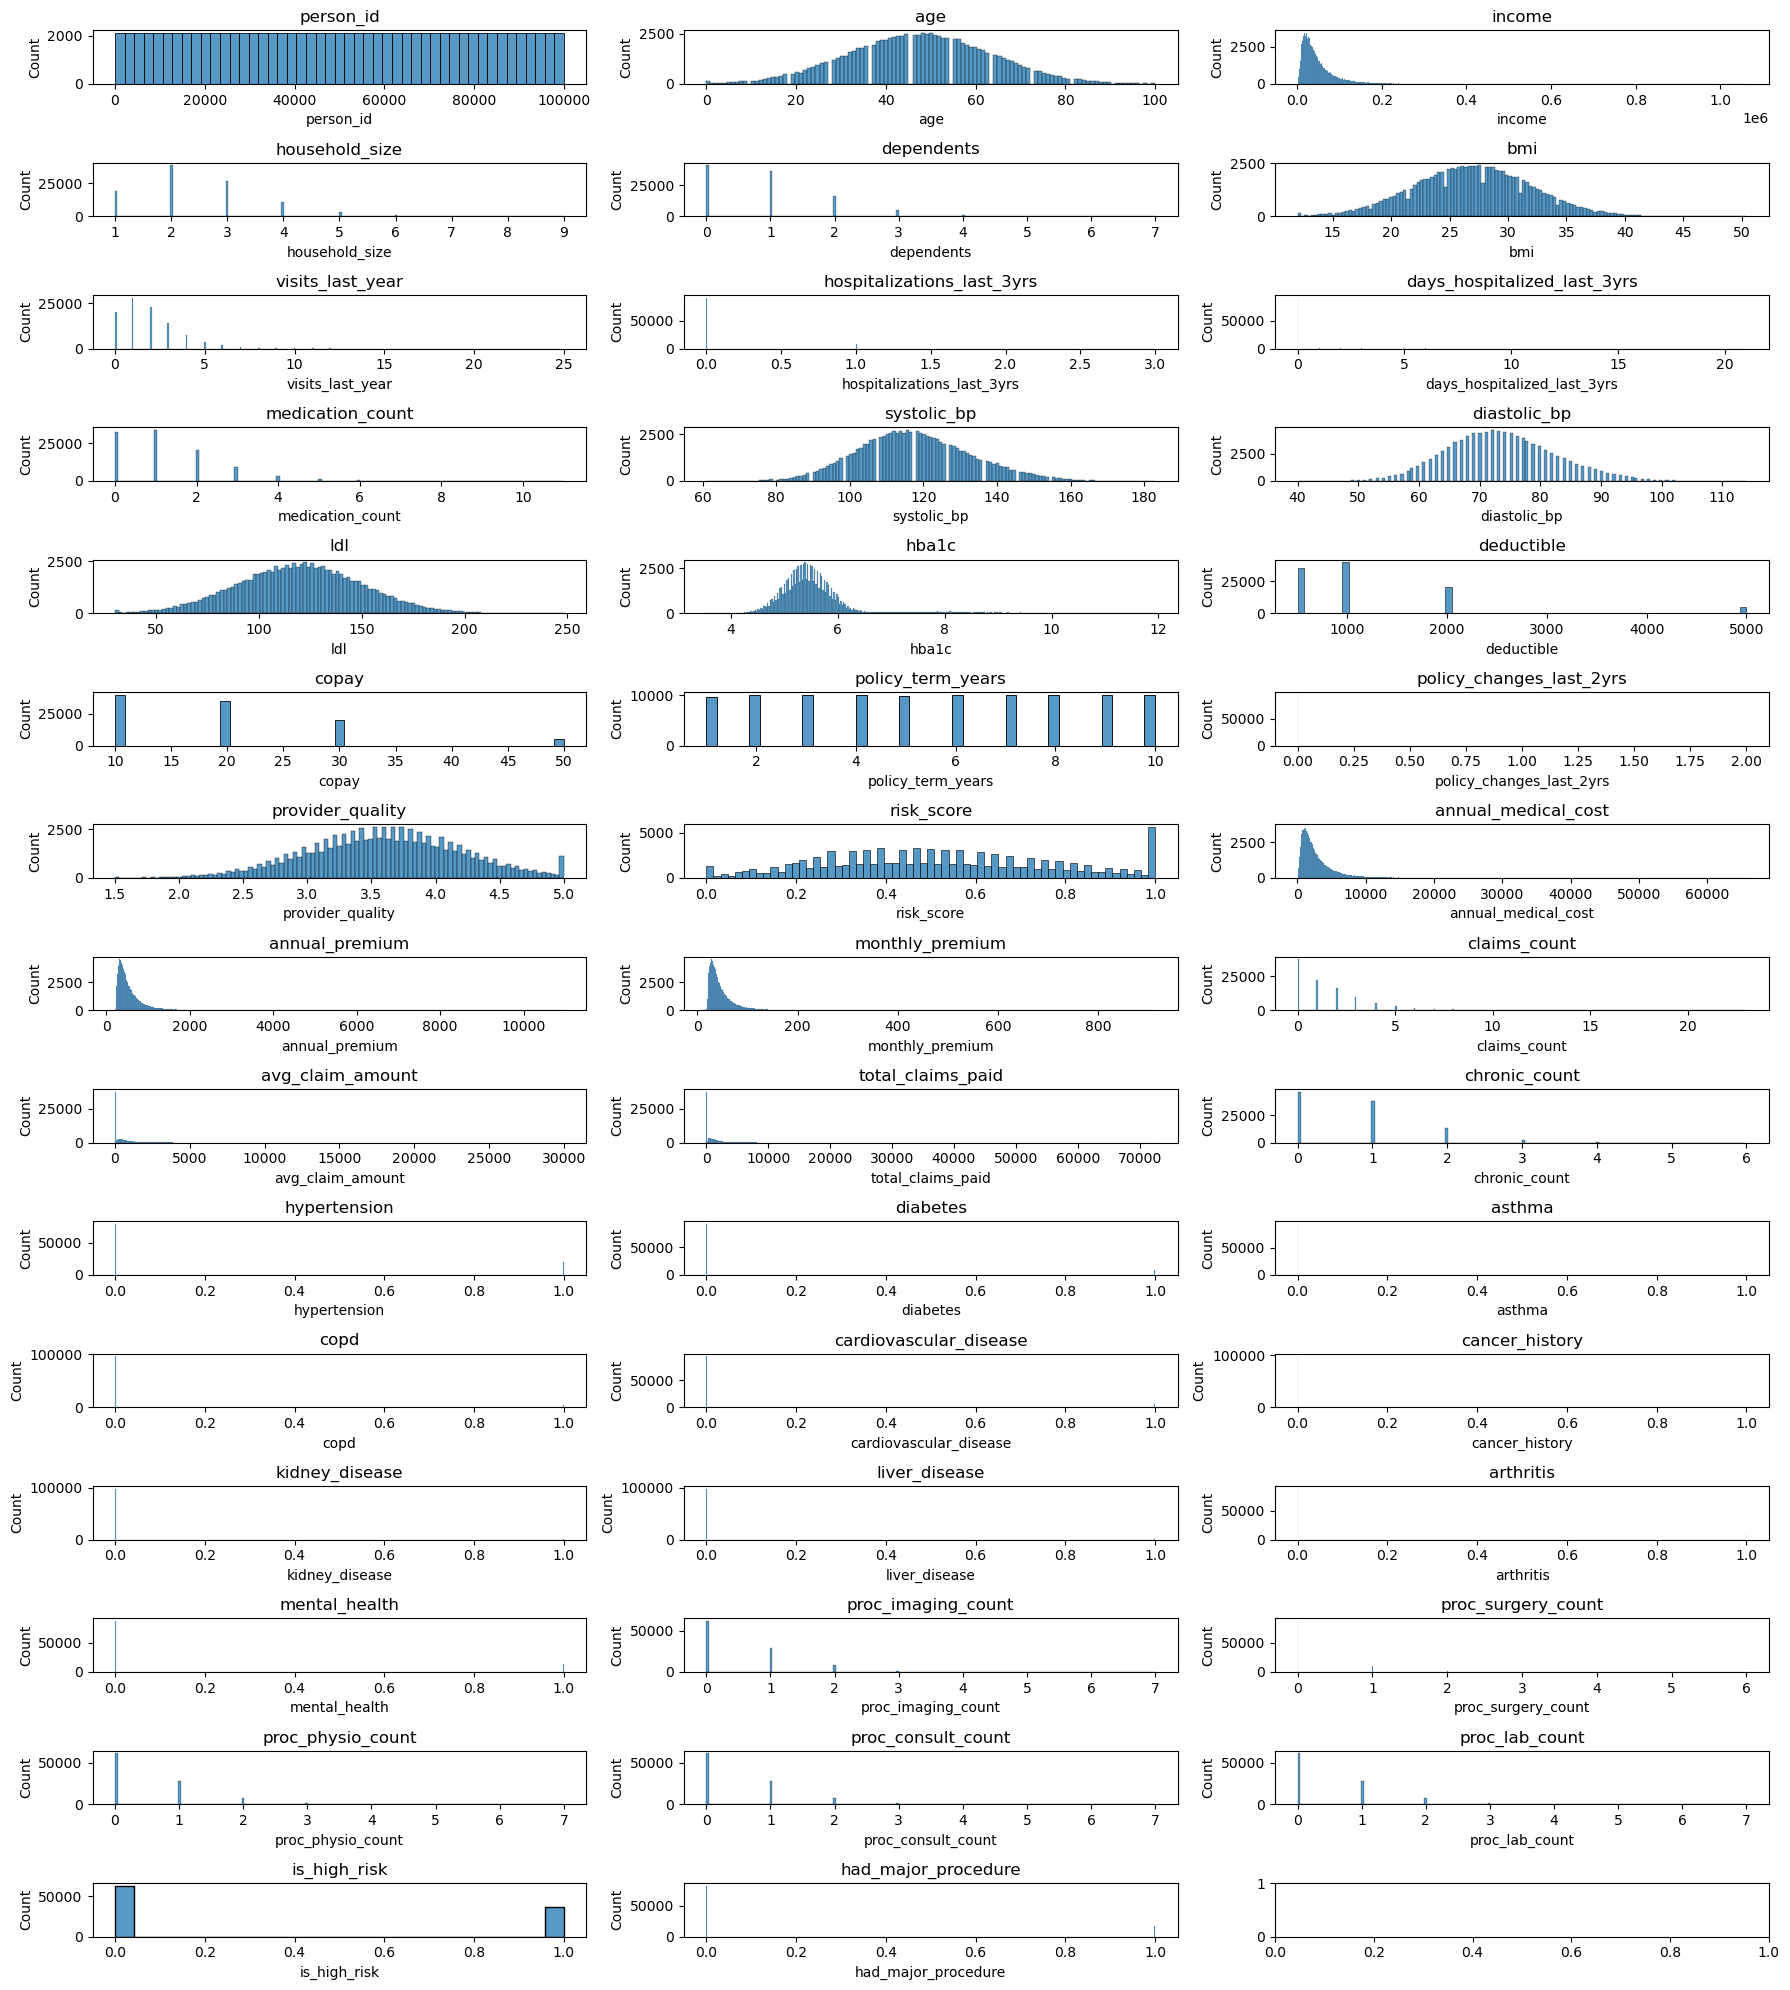

In [35]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, ncols=3, figsize=(18, 20))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
plt.tight_layout()
plt.show()


In [38]:
df_clean.head(2)

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0


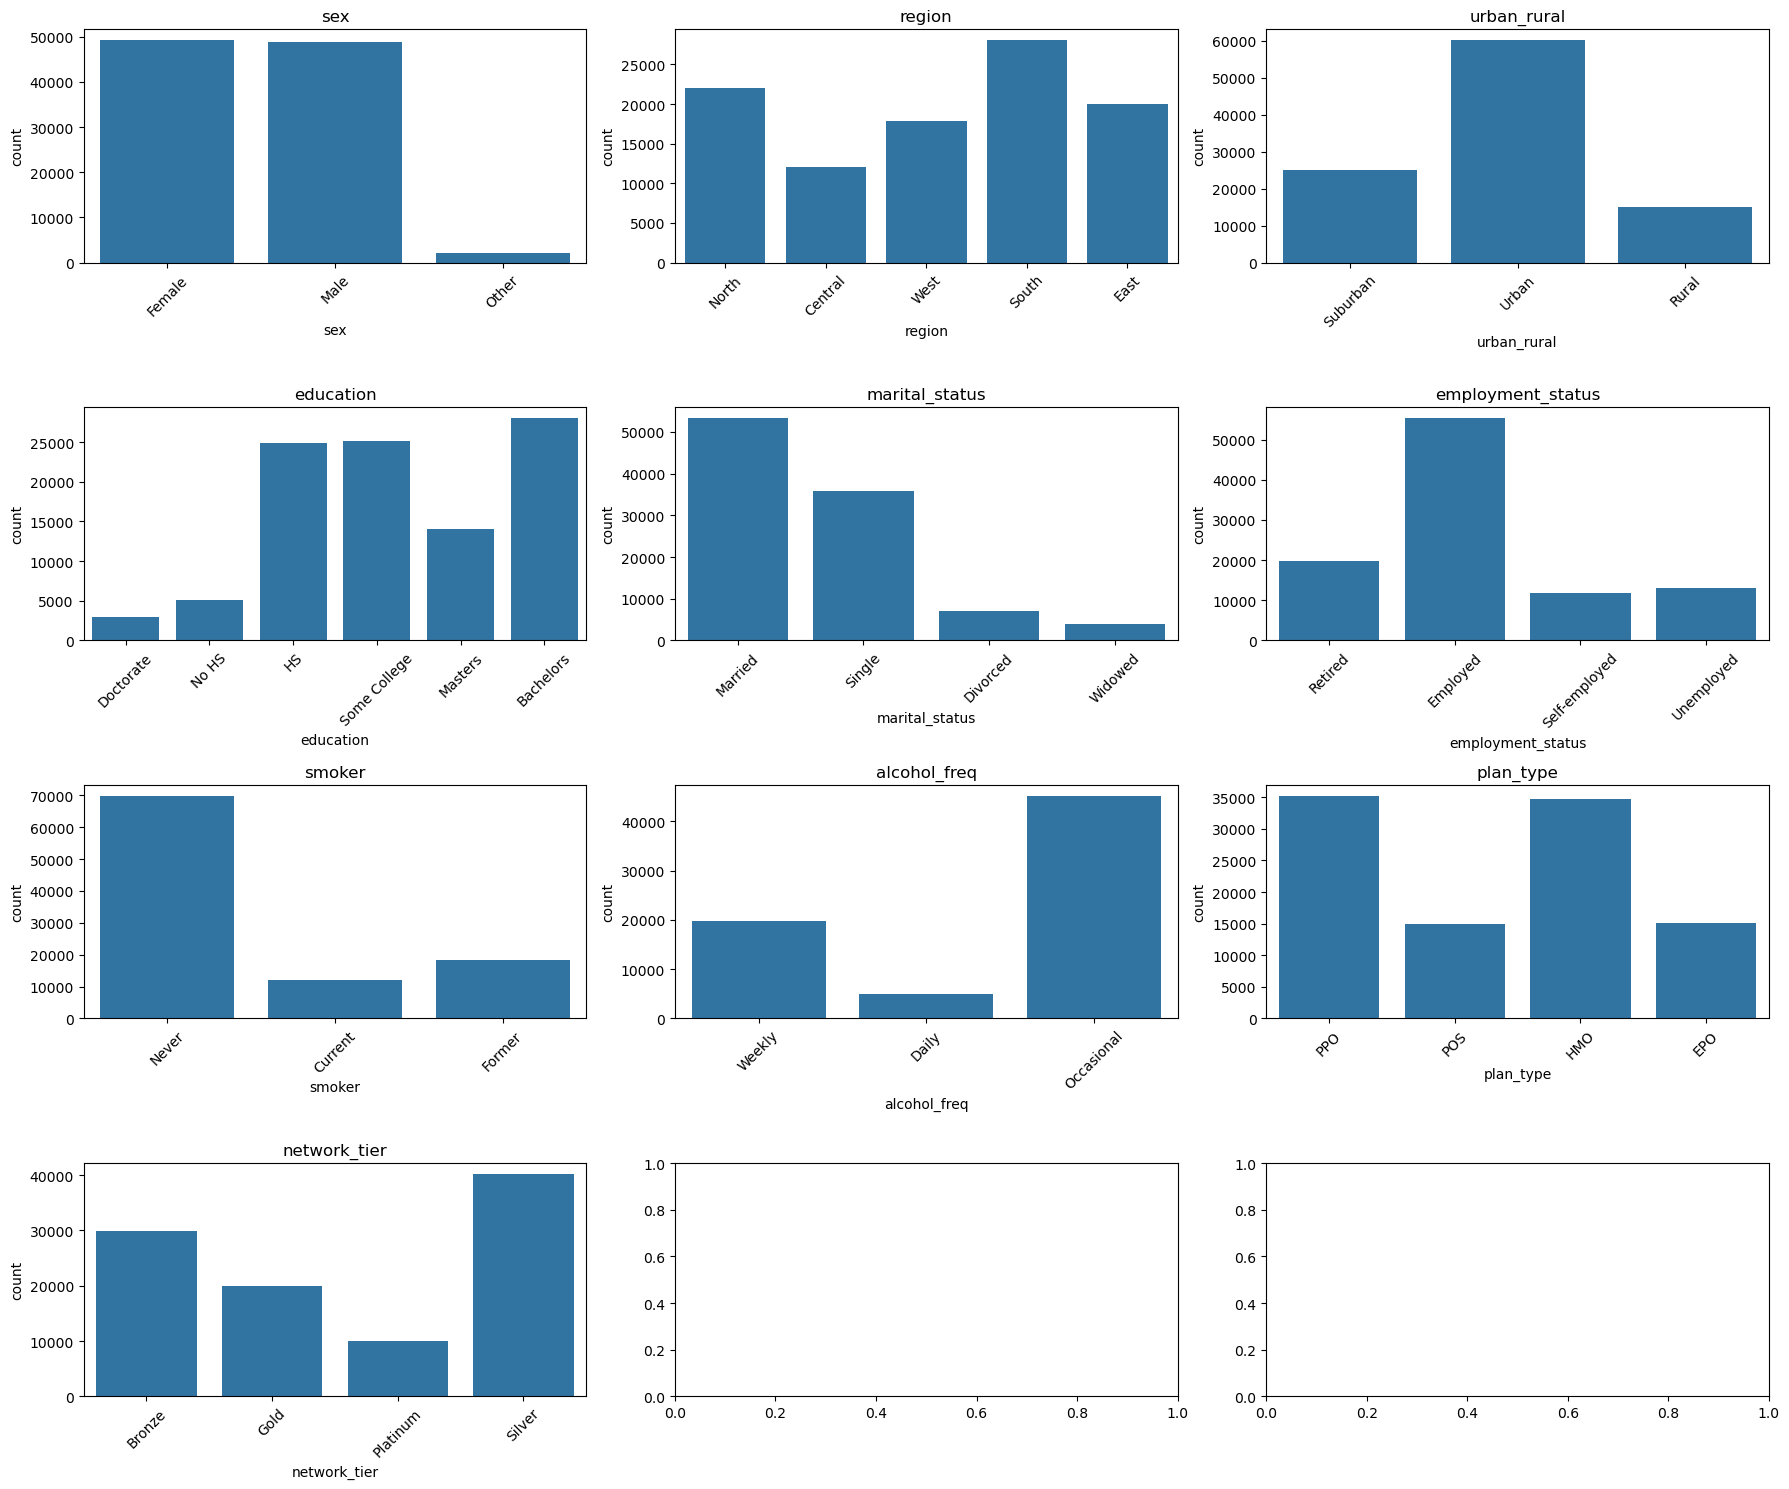

In [37]:
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns

# Tracer les distributions
fig, axes = plt.subplots(nrows=len(categorical_cols)//3 + 1, ncols=3, figsize=(18, 15))
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_clean, x=col, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


## Création de X et y

In [10]:
X = df.drop(columns=["annual_medical_cost", "person_id"])  
y = df["annual_medical_cost"]  # coût annuel de l'assurance

## Choix des features

Nous avons désormais une idée de la distribution de nos données. Néanmoins, en raison de la forte dimensionnalité, il convient de se méfier de la malédiction de la dimensionnalité. Afin d’optimiser l’entraînement de nos modèles, il est nécessaire de ne conserver que les variables réellement utiles et informatives pour l’apprentissage.

In [11]:
X.head()

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

In [15]:
num_cols

Index(['age', 'income', 'household_size', 'dependents', 'bmi',
       'visits_last_year', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay',
       'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
       'risk_score', 'annual_premium', 'monthly_premium', 'claims_count',
       'avg_claim_amount', 'total_claims_paid', 'chronic_count',
       'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease',
       'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis',
       'mental_health', 'proc_imaging_count', 'proc_surgery_count',
       'proc_physio_count', 'proc_consult_count', 'proc_lab_count',
       'is_high_risk', 'had_major_procedure'],
      dtype='object')

In [16]:
cat_cols

Index(['sex', 'region', 'urban_rural', 'education', 'marital_status',
       'employment_status', 'smoker', 'plan_type', 'network_tier'],
      dtype='object')

In [17]:
X_num = X_train[num_cols]
np.shape(X_num)

(80000, 42)

#### Choix des features numériques

Nous commençons par analyser les **variables numériques** pour identifier celles offrant le meilleur pouvoir prédictif.
Pour cela, nous utilisons **`SequentialFeatureSelector`** avec une évaluation basée sur le **RMSE**.

À chaque itération :
- Un sous-ensemble croissant de variables est testé.
- Le **RMSE** est calculé pour évaluer la performance.
- L'objectif est de déterminer le **nombre optimal de variables** minimisant l'erreur tout en évitant la redondance.

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import time

t = time.time()

# Pipeline 
estimator = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.01, max_iter=10000)
)

selector = SequentialFeatureSelector(
    estimator,
    n_features_to_select=20,
    direction="forward",
    n_jobs=-1
)

selector = selector.fit(X_num, y_train)

print(selector.get_support())
print("durée: {:.2f} secondes".format(time.time() - t))

[ True  True False  True  True  True False  True  True False False False
 False  True False False  True  True  True  True  True  True  True  True
 False False False False False False  True False False False False  True
 False False False  True  True False]
durée: 242.04 secondes


=== Sélection de 5 features ===
RMSE moyen : 771.3277 | Durée : 41.1 s
=== Sélection de 10 features ===
RMSE moyen : 768.3625 | Durée : 96.5 s
=== Sélection de 15 features ===
RMSE moyen : 768.3598 | Durée : 169.5 s
=== Sélection de 20 features ===
RMSE moyen : 768.3722 | Durée : 242.6 s
=== Sélection de 25 features ===
RMSE moyen : 768.3904 | Durée : 325.3 s
=== Sélection de 30 features ===
RMSE moyen : 768.4423 | Durée : 428.7 s
=== Sélection de 35 features ===
RMSE moyen : 768.5023 | Durée : 467.5 s
=== Sélection de 40 features ===
RMSE moyen : 768.6251 | Durée : 555.0 s


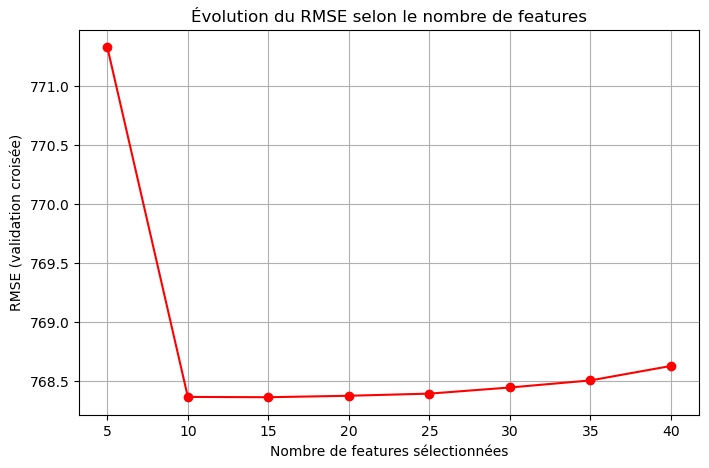

In [23]:
from sklearn.model_selection import cross_val_score

estimator = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.01, max_iter=10000)
)


n_features_list = [5, 10, 15, 20, 25, 30,35, 40] # liste des features
rmse_scores = []
durations = []

for n in n_features_list:
    print(f"=== Sélection de {n} features ===")
    t = time.time()
    
    selector = SequentialFeatureSelector(
        estimator,
        n_features_to_select=n,
        direction="forward",
        n_jobs=-1
    )
    
    selector.fit(X_num, y_train)
    selected_features = X_num.columns[selector.get_support()]
    
    X_selected = X_num[selected_features]
    
    # Validation croisée avec RMSE
    neg_rmse_scores = cross_val_score(
        estimator, X_selected, y_train, cv=5, scoring='neg_root_mean_squared_error'
    )
    mean_rmse = -np.mean(neg_rmse_scores)
    
    duration = time.time() - t
    rmse_scores.append(mean_rmse)
    durations.append(duration)
    
    print(f"RMSE moyen : {mean_rmse:.4f} | Durée : {duration:.1f} s")


plt.figure(figsize=(8,5))
plt.plot(n_features_list, rmse_scores, marker='o', color='red')
plt.title("Évolution du RMSE selon le nombre de features")
plt.xlabel("Nombre de features sélectionnées")
plt.ylabel("RMSE (validation croisée)")
plt.grid(True)
plt.show()

Il semble de choisir les 10 ou 15 premières features numériques est une bonne solution dans notre base de données. Cela semble suffir pour expliquer nos données.

In [24]:
t = time.time()

# Pipeline
estimator = make_pipeline(
    StandardScaler(),
    Lasso(alpha=0.01, max_iter=10000)
)

selector = SequentialFeatureSelector(
    estimator,
    n_features_to_select=15,
    direction="forward",
    n_jobs=-1
)

selector = selector.fit(X_num, y_train)

selected_features = X_num.columns[selector.get_support()]   
X_num_selected = X_num[selected_features]                 

print("Features sélectionnées :", list(selected_features))
print("Nouvelle forme de X :", X_num_selected.shape)
print("Durée: {:.2f} secondes".format(time.time() - t))

Features sélectionnées : ['age', 'dependents', 'bmi', 'visits_last_year', 'days_hospitalized_last_3yrs', 'deductible', 'risk_score', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'cancer_history', 'proc_lab_count', 'is_high_risk']
Nouvelle forme de X : (80000, 15)
Durée: 182.24 secondes


#### Choix des features catégoriels

Nous étendons maintenant l'analyse aux **variables catégorielles** en utilisant la méthode suivante :

1. **Encodage One-Hot** : Chaque variable catégorielle est transformée en variables binaires.
2. **Ajout progressif** : Les variables encodées sont ajoutées **une par une** au modèle.
3. **Évaluation de l'impact** : Le **score de performance** (ex: RMSE, R²) est mesuré après chaque ajout pour identifier les variables les plus contributives.

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder

In [40]:
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

X_num_scaled = scaler.fit_transform(X_num_selected)

model_base = Ridge()

scores = cross_val_score(model_base, X_num_scaled, y_train, cv=5,
                         scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
mean_mape = -scores.mean()

print(f"Modèle de base'")
print(f" MAPE moyen : {mean_mape:.4f}")
print(f" Dimensions : {X_num_scaled.shape}")
print(f" Durée : {time.time() - t:.2f} s")
print("-" * 50)


for col in cat_cols:
    t = time.time()
    X_cat = X_train[[col]]
    X_encoded = enc.fit_transform(X_cat)
    X_combined = np.concatenate((X_num_scaled, X_encoded), axis=1)

    model = Ridge()

    scores = cross_val_score(model, X_combined, y_train, cv=5,
                             scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
    mean_mape = -scores.mean()

    print(f"Colonne ajoutée : '{col}'")
    print(f" MAPE moyen : {mean_mape:.4f}")
    print(f" Dimensions : {X_combined.shape}")
    print(f" Durée : {time.time() - t:.2f} s")
    print("-" * 50)

Modèle de base'
 MAPE moyen : 0.1779
 Dimensions : (80000, 15)
 Durée : 5831.07 s
--------------------------------------------------
Colonne ajoutée : 'sex'
 MAPE moyen : 0.1779
 Dimensions : (80000, 18)
 Durée : 2.57 s
--------------------------------------------------
Colonne ajoutée : 'region'
 MAPE moyen : 0.1779
 Dimensions : (80000, 20)
 Durée : 0.44 s
--------------------------------------------------
Colonne ajoutée : 'urban_rural'
 MAPE moyen : 0.1779
 Dimensions : (80000, 18)
 Durée : 0.31 s
--------------------------------------------------
Colonne ajoutée : 'education'
 MAPE moyen : 0.1779
 Dimensions : (80000, 21)
 Durée : 0.30 s
--------------------------------------------------
Colonne ajoutée : 'marital_status'
 MAPE moyen : 0.1779
 Dimensions : (80000, 19)
 Durée : 0.28 s
--------------------------------------------------
Colonne ajoutée : 'employment_status'
 MAPE moyen : 0.1779
 Dimensions : (80000, 19)
 Durée : 0.27 s
------------------------------------------------

L'ajout progressif des variables catégorielles après encodage One-Hot révèle des résultats intéressants :

- **Seule la variable `smoker`** montre un **impact significatif** sur la performance du modèle, avec une **réduction du MAPE** (de 0.1779 à 0.1777).
- Les autres variables (`sex`, `region`, `urban_rural`, `education`, `marital_status`, `employment_status`, `plan_type`) **n'ont aucun effet** sur le MAPE, qui reste stable à 0.1779.
- La variable `network_tier` dégrade même légèrement la performance (MAPE = 0.2054).

### Limites de l'Approche
Cette méthode d'ajout **individuel** des variables ne permet pas d'évaluer :
- Les **effets combinés** des variables catégorielles.
- Les **interactions potentielles** entre plusieurs variables.

In [31]:
import itertools

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
model = Ridge()

t = time.time()
scores = cross_val_score(
    model, X_num_selected, y_train, cv=5,
    scoring='neg_mean_absolute_percentage_error', n_jobs=-1
)
mean_mape = -scores.mean()

print(f"Modèle de base :")
print(f" MAPE moyen : {mean_mape:.4f}")
print(f" Dimensions : {X_num_selected.shape}")
print(f" Durée : {time.time() - t:.2f} s")
print("-" * 50)

for col1, col2 in itertools.combinations(cat_cols, 2):
    t = time.time()

    X_cat = X_train[[col1, col2]]
    X_encoded = enc.fit_transform(X_cat)

    X_combined = np.concatenate((X_num_selected, X_encoded), axis=1)

    model = Ridge()

    scores = cross_val_score(
        model, X_combined, y_train, cv=5,
        scoring='neg_mean_absolute_percentage_error', n_jobs=-1
    )
    mean_mape = -scores.mean()

    print(f"Colonnes ajoutées : '{col1}' + '{col2}'")
    print(f" MAPE moyen : {mean_mape:.4f}")
    print(f" Dimensions : {X_combined.shape}")
    print(f" Durée : {time.time() - t:.2f} s")
    print("-" * 50)

Modèle de base :
 MAPE moyen : 0.1779
 Dimensions : (80000, 15)
 Durée : 3.31 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'region'
 MAPE moyen : 0.1779
 Dimensions : (80000, 23)
 Durée : 2.34 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'urban_rural'
 MAPE moyen : 0.1779
 Dimensions : (80000, 21)
 Durée : 0.32 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'education'
 MAPE moyen : 0.1779
 Dimensions : (80000, 24)
 Durée : 0.33 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'marital_status'
 MAPE moyen : 0.1779
 Dimensions : (80000, 22)
 Durée : 0.31 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'employment_status'
 MAPE moyen : 0.1779
 Dimensions : (80000, 22)
 Durée : 0.33 s
--------------------------------------------------
Colonnes ajoutées : 'sex' + 'smoker'
 MAPE moyen : 0.1776
 Dimensions : (80000, 21)
 Du

- **Seule la variable `smoker`** a un **impact mesurable** sur la performance du modèle (réduction du MAPE de 0.1779 à 0.1777).
- **Aucune synergie** n’a été observée entre les variables catégorielles testées :
  - Les combinaisons de variables **n’améliorent pas** la performance par rapport à l’utilisation de `smoker` seul.
  - Certaines combinaisons (comme `network_tier`) **dégradaient même** la performance (MAPE = 0.2054).

##### Décision
En l’absence de synergies significatives, nous **conserverons uniquement la variable `smoker`** pour les prochaines étapes de modélisation. Cela permet de :
- **Simplifier le modèle** en réduisant la dimensionalité.
- **Éviter le bruit** introduit par des variables non contributives.

In [39]:
from sklearn.compose import ColumnTransformer

In [41]:
num_cols = selected_features
cat_cols = ["smoker"] 

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),      
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop' 
)

## Choix des modèles

Pour la suite de notre analyse, nous allons comparer les performances de **5 modèles de régression**.
L'objectif est d'identifier le modèle offrant le **meilleur compromis** entre performance prédictive et complexité.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [43]:
models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42),
    "DT": DecisionTreeRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7, random_state=42),
    "KNN": KNeighborsRegressor()
}

In [45]:
for name, model in models.items():
    print(f'Training Model {name} \n{"-"*55}')
    
    # Pipeline 
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Entraînement
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Scores
    print(f'Training R-squared: {r2_score(y_train, y_pred_train):.4f}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred_test):.4f}')
    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.4f}')
    print()

Training Model LR 
-------------------------------------------------------
Training R-squared: 0.9397
Testing R-squared: 0.9397
Mean Squared Error: 593643.9591
Mean Absolute Error: 449.0673

Training Model RF 
-------------------------------------------------------
Training R-squared: 0.9536
Testing R-squared: 0.9468
Mean Squared Error: 523546.0806
Mean Absolute Error: 420.1011

Training Model DT 
-------------------------------------------------------
Training R-squared: 1.0000
Testing R-squared: 0.9016
Mean Squared Error: 968214.1055
Mean Absolute Error: 519.6517

Training Model GradientBoosting 
-------------------------------------------------------
Training R-squared: 0.9706
Testing R-squared: 0.9493
Mean Squared Error: 498413.8046
Mean Absolute Error: 389.3070

Training Model KNN 
-------------------------------------------------------
Training R-squared: 0.9466
Testing R-squared: 0.9194
Mean Squared Error: 792831.2602
Mean Absolute Error: 567.3157



### Analyse Comparée des Modèles de Machine Learning

Les métriques utilisées sont le **R-squared**, le **Mean Squared Error (MSE)** et le **Mean Absolute Error (MAE)**.

---

#### Top 3 des Modèles par Métrique

##### 1. Top 3 par R-squared (Test)
Le **R-squared** mesure la proportion de variance expliquée par le modèle. Plus il est proche de 1, meilleure est la performance.

| Rang | Modèle               | R-squared (Test) |
|------|----------------------|------------------|
| 1    | GradientBoosting     | 0.9493           |
| 2    | Random Forest        | 0.9468           |
| 3    | Régression Linéaire  | 0.9397           |

---

##### 2. Top 3 par Mean Squared Error (MSE) (Test)
Le **MSE** mesure l'erreur quadratique moyenne. Plus il est bas, plus le modèle est précis.

| Rang | Modèle               | MSE (Test)      |
|------|----------------------|-----------------|
| 1    | GradientBoosting     | 498 413.80      |
| 2    | Random Forest        | 523 546.08      |
| 3    | Régression Linéaire  | 593 643.96      |

---

##### 3. Top 3 par Mean Absolute Error (MAE) (Test)
Le **MAE** mesure l'erreur absolue moyenne. Plus il est bas, plus le modèle est précis.

| Rang | Modèle               | MAE (Test)      |
|------|----------------------|-----------------|
| 1    | GradientBoosting     | 389.31          |
| 2    | Random Forest        | 420.10          |
| 3    | Régression Linéaire  | 449.07          |

---

#### Conclusion
Le modèle **GradientBoosting** se distingue comme le plus performant sur toutes les métriques, suivi du **Random Forest** et de la **Régression Linéaire**.

---
- Le modèle **Arbre de Décision** montre un **R-squared parfait (1.0)** sur les données d'entraînement, ce qui indique un **overfitting**. Ses performances sur les données de test sont significativement moins bonnes, confirmant ce problème.


### Optimisation

In [47]:
# Définir les pipelines pour chaque modèle
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error', 
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

Meilleurs paramètres : {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}
Meilleur score : -482342.6221297501


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'regressor__n_estimators': [50, 100, 150, 200], 
    'regressor__max_depth': [3, 5, 7, 10],          
    'regressor__bootstrap': [True, False]           
}


random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist_rf,
    n_iter=50,  
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Meilleurs paramètres :", random_search.best_params_)
print("Meilleur score :", random_search.best_score_)


/home/yohan/miniconda3/envs/tuto/lib/python3.13/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs paramètres : {'regressor__n_estimators': 100, 'regressor__max_depth': 10, 'regressor__bootstrap': True}
Meilleur score : -492015.3841880687


In [60]:
best_params_rf = random_search.best_params_          # issus du RandomizedSearchCV
best_params_gb = grid_search.best_params_            # issus du GridSearchCV

# Nettoyage des préfixes "regressor__"
rf_params = {k.replace('regressor__', ''): v for k, v in best_params_rf.items()}
gb_params = {k.replace('regressor__', ''): v for k, v in best_params_gb.items()}


pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, **rf_params))
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42, **gb_params))
])

pipeline_rf.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)

for name, pipe in [("Random Forest", pipeline_rf), ("Gradient Boosting", pipeline_gb)]:
    print(f"\n===== {name} =====")
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)
    
    print(f"Training R²: {r2_score(y_train, y_pred_train):.4f}")
    print(f"Testing R²:  {r2_score(y_test, y_pred_test):.4f}")
    print(f"MSE:         {mean_squared_error(y_test, y_pred_test):.4f}")
    print(f"MAE:         {mean_absolute_error(y_test, y_pred_test):.4f}")
    print(f"Hyperparamètres utilisés : {pipe.named_steps['regressor']}")


===== Random Forest =====
Training R²: 0.9650
Testing R²:  0.9500
MSE:         491936.5405
MAE:         391.3655
Hyperparamètres utilisés : RandomForestRegressor(max_depth=10, random_state=42)

===== Gradient Boosting =====
Training R²: 0.9629
Testing R²:  0.9503
MSE:         489490.8092
MAE:         396.5822
Hyperparamètres utilisés : GradientBoostingRegressor(max_depth=5, random_state=42)


## Analyse des Performances

### R² (Coefficient de Détermination)
- Les deux modèles ont des **performances très similaires** en termes de **Testing R²** (0.9500 pour Random Forest et 0.9503 pour Gradient Boosting).
- Le **Training R²** est légèrement supérieur pour Random Forest (0.9650 contre 0.9629), mais cette différence est minime.

### MSE (Mean Squared Error)
- Le **Gradient Boosting** a un **MSE légèrement inférieur** (489,490.81 contre 491,936.54), ce qui indique qu'il commet des erreurs quadratiques moyennes un peu moins importantes.
- Une différence de MSE aussi faible suggère que les deux modèles ont des performances presque équivalentes en termes d'erreur quadratique.

### MAE (Mean Absolute Error)
- Le **Random Forest** a un **MAE légèrement inférieur** (391.37 contre 396.58), ce qui signifie qu'il commet des erreurs absolues moyennes un peu moins importantes.

---

## Conclusion
Les deux modèles montrent des **performances très proches** sur les données de test, avec des valeurs de **Testing R²** quasi identiques.